In [1]:
import numpy as np
import matplotlib.pyplot as plt
from abc import ABC, abstractmethod

In [2]:
X = np.array([[1, -1], [1, 0.3], [1, 2]])
yt = np.array([-0.1, 0.5, 0.5])

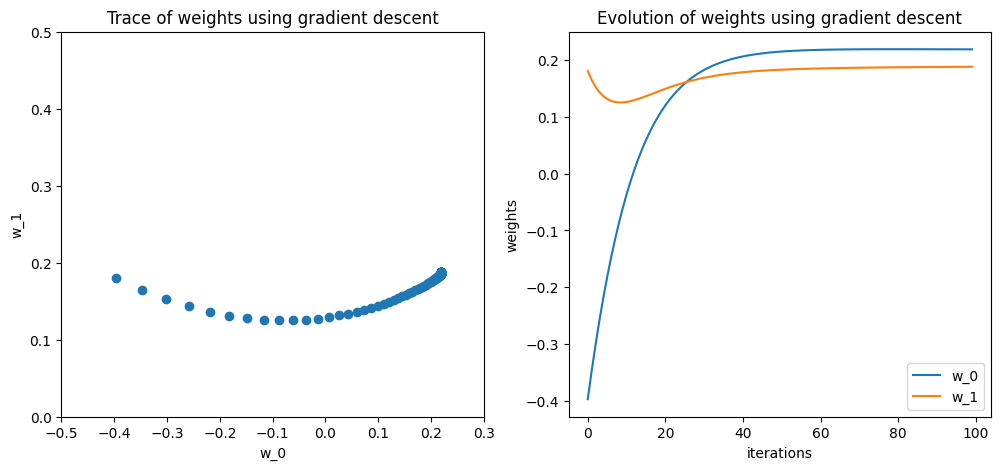

In [5]:
class StepFunction(ABC):
    
    @abstractmethod
    def step(self, X, gradient):
        pass

class GD(StepFunction):
    
    def step(self, X, gradient):
        return 0.08 * gradient.mean(0)

class LineSearch(StepFunction):
    
    def step(self, X, gradient):
        result = self.calc_n(X, gradient) * gradient
        return result.mean(0)
    
    def calc_n(self, X, gradient):
        H = np.expand_dims(X, axis=2) @ np.expand_dims(X, axis=1)
        numerator = np.expand_dims(gradient, axis=1) @ np.expand_dims(gradient, axis=2)
        denominator = np.expand_dims(gradient, axis=1) @ H @ np.expand_dims(gradient, axis=2)
        
        return (numerator/denominator)[:, 0]

class Neuron():
    
    def __init__(self, step_function, w):
        self.step_function = step_function
        self.w_old = w
    
    def learn(self, X, yt):
        y = X @ self.w_old

        error =  1/2 * (y - yt)**2
        error_prime = (y - yt)

        #                        delta  f(h)
        gradient_b = error_prime * (1)
        gradient_w = error_prime * (1 * X @ self.w_old)
        gradient = np.vstack([gradient_b, gradient_w]).T

        step = self.step_function.step(X, gradient)
    #     print(step)
        w_new = self.w_old - step
        self.w_old = w_new
        return w_new


step_function = GD()
w = np.array([-0.45, 0.2])
neuron = Neuron(step_function, w)

W = []
r = np.arange(100)
for i in r:
    w = neuron.learn(X, yt)
    W.append(w)
W = np.array(W)
    

def plot(W):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

    ax1.scatter(W[:, 0], W[:, 1])
    ax1.set_ylim(0.0, 0.5)
    ax1.set_xlim(-0.5, 0.3)
    ax1.set_title('Trace of weights using gradient descent')
    ax1.set_xlabel('w_0')
    ax1.set_ylabel('w_1')

    ax2.plot(r, W[:, 0], label='w_0')
    ax2.plot(r, W[:, 1], label='w_1')
    ax2.set_title('Evolution of weights using gradient descent')
    ax2.set_xlabel('iterations')
    ax2.set_ylabel('weights')
    ax2.legend()

plot(W)